<a href="https://colab.research.google.com/github/krishgit042023/Stock-price-prediction-using-Random-Forest/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

# Use yf.Ticker with a capital "T"
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

In [ ]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-02 00:00:00-05:00,6040.109863,6053.580078,6035.330078,6047.149902,4412470000,0.0,0.0
2024-12-03 00:00:00-05:00,6042.970215,6052.069824,6033.390137,6049.879883,4095000000,0.0,0.0
2024-12-04 00:00:00-05:00,6069.390137,6089.839844,6061.060059,6086.490234,4003390000,0.0,0.0


# **PREDICT WHETHER THE STOCK PRICE WILL GO UP OR GO DOWN TOMORROW**

In [ ]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-11-22 00:00:00-05:00', '2024-11-25 00:00:00-05:00',
               '2024-11-26 00:00:00-05:00', '2024-11-27 00:00:00-05:00',
               '2024-11-29 00:00:00-05:00', '2024-12-02 00:00:00-05:00',
               '2024-12-03 00:00:00-05:00', '2024-12-04 00:00:00-05:00',
               '2024-12-05 00:00:00-05:00', '2024-12-06 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24351, freq=None)

**Cleaning and visualizing our stock market data**

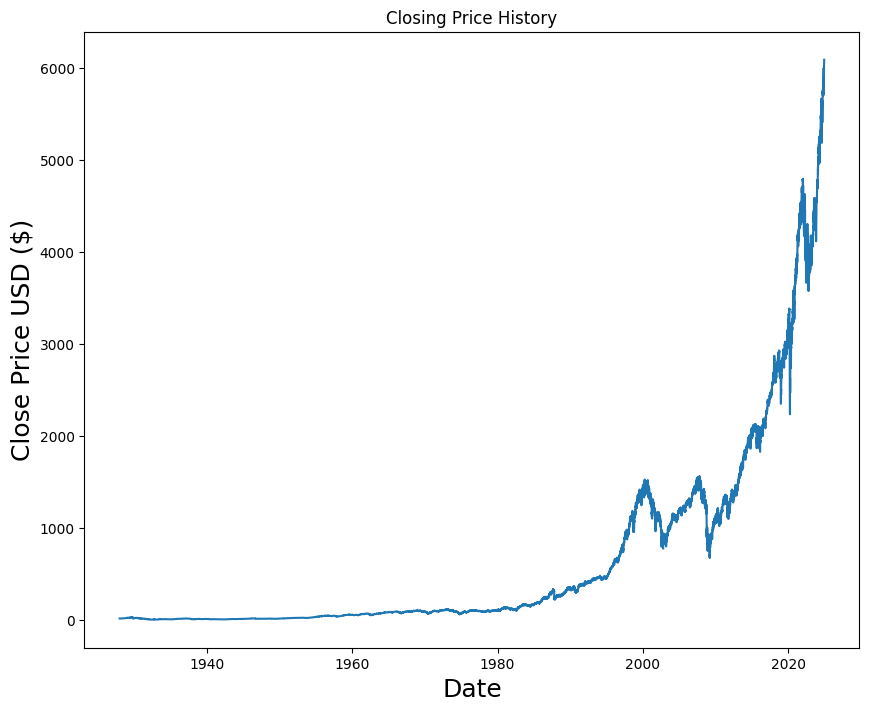

In [ ]:
# prompt: show the closing price with respect to index

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title('Closing Price History')
plt.plot(sp500['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [ ]:
# prompt: remove Dividends and Stock Splits columns

import matplotlib.pyplot as plt


# Remove 'Dividends' and 'Stock Splits' columns
sp500 = sp500.drop(columns=['Dividends', 'Stock Splits'])

In [ ]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2024-12-02 00:00:00-05:00,6040.109863,6053.580078,6035.330078,6047.149902,4412470000
2024-12-03 00:00:00-05:00,6042.970215,6052.069824,6033.390137,6049.879883,4095000000
2024-12-04 00:00:00-05:00,6069.390137,6089.839844,6061.060059,6086.490234,4003390000


**setting up our target for machine learning**

In [ ]:
# prompt: create a column name it tomorrow , which will have the closing price next day

sp500['Tomorrow'] = sp500['Close'].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-12-02 00:00:00-05:00,6040.109863,6053.580078,6035.330078,6047.149902,4412470000,6049.879883
2024-12-03 00:00:00-05:00,6042.970215,6052.069824,6033.390137,6049.879883,4095000000,6086.490234
2024-12-04 00:00:00-05:00,6069.390137,6089.839844,6061.060059,6086.490234,4003390000,6075.109863


In [ ]:
# prompt: see whether tomorrow price is greater than closing price

sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-12-02 00:00:00-05:00,6040.109863,6053.580078,6035.330078,6047.149902,4412470000,6049.879883,1
2024-12-03 00:00:00-05:00,6042.970215,6052.069824,6033.390137,6049.879883,4095000000,6086.490234,1
2024-12-04 00:00:00-05:00,6069.390137,6089.839844,6061.060059,6086.490234,4003390000,6075.109863,0


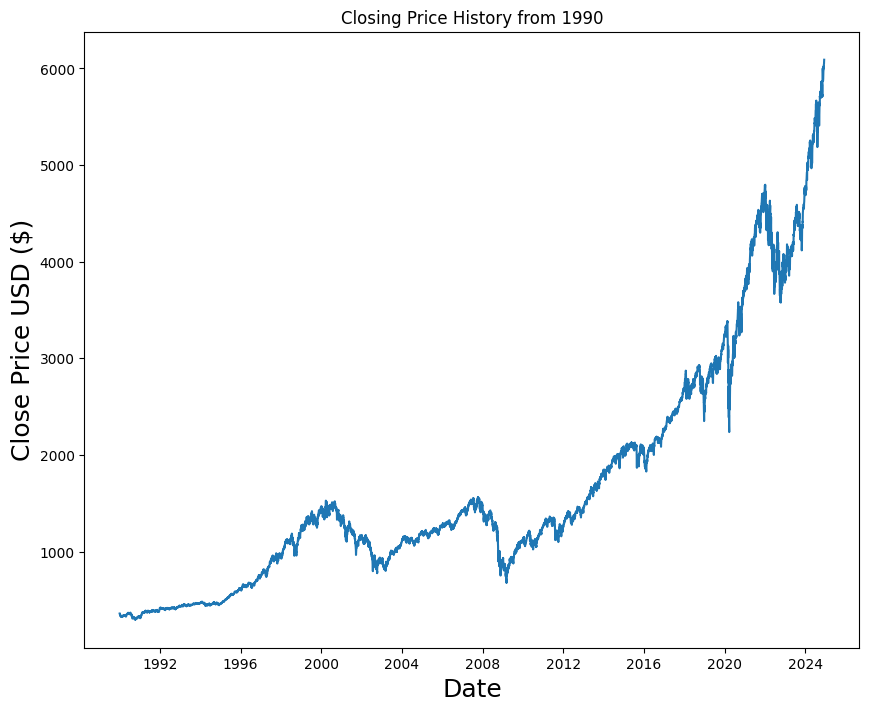

In [ ]:
# prompt: consider all the dates from 1990

# Assuming 'sp500' DataFrame from the previous code is available.

# Filter data for dates from 1990 onwards
sp500_1990 = sp500[sp500.index >= '1990-01-01']

# Now you can work with the sp500_1990 DataFrame which contains data from 1990 onwards.
# Example: Plotting closing prices from 1990
plt.figure(figsize=(10, 8))
plt.title('Closing Price History from 1990')
plt.plot(sp500_1990['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
sp500_1990

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-12-02 00:00:00-05:00,6040.109863,6053.580078,6035.330078,6047.149902,4412470000,6049.879883,1
2024-12-03 00:00:00-05:00,6042.970215,6052.069824,6033.390137,6049.879883,4095000000,6086.490234,1
2024-12-04 00:00:00-05:00,6069.390137,6089.839844,6061.060059,6086.490234,4003390000,6075.109863,0


**Training an initial machine learning model**

In [ ]:
# prompt: implement random forest model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Prepare the data
# Assuming 'sp500_1990' DataFrame is available and has 'Target' column and relevant features.
# Replace 'feature1', 'feature2', etc. with actual feature names in your DataFrame.
features = ['Open', 'High', 'Low','Close' ,'Volume']  # Example features, replace with relevant ones
target = 'Target'

# Split data into training and testing sets
X = sp500_1990[features]
y = sp500_1990[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed


# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100 ,random_state=42) # Adjust n_estimators and other parameters
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model (e.g., calculate accuracy)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5258375922771152


In [ ]:
# prompt: improve the accuracy of the model

import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np

# Use yf.Ticker with a capital "T"
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

# **PREDICT WHETHER THE STOCK PRICE WILL GO UP OR GO DOWN TOMORROW**

# **Cleaning and visualizing our stock market data**
sp500 = sp500.drop(columns=['Dividends', 'Stock Splits'])

# **Setting up our target for machine learning**
sp500['Tomorrow'] = sp500['Close'].shift(-1)
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

# Filter data for dates from 1990 onwards
sp500_1990 = sp500[sp500.index >= '1990-01-01']

# Feature Engineering (Adding more relevant features)
sp500_1990['SMA_50'] = sp500_1990['Close'].rolling(window=50).mean()
sp500_1990['SMA_200'] = sp500_1990['Close'].rolling(window=200).mean()
sp500_1990['Daily_Return'] = sp500_1990['Close'].pct_change()
sp500_1990['Volatility'] = sp500_1990['Daily_Return'].rolling(window=20).std()

# Drop rows with NaN values created by the rolling calculations
sp500_1990.dropna(inplace=True)


# Prepare the data
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_50', 'SMA_200', 'Daily_Return', 'Volatility']
target = 'Target'

# Split data
X = sp500_1990[features]
y = sp500_1990[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Try different numbers of trees
    'max_depth': [None, 10, 20],      # Experiment with different tree depths
    'min_samples_split': [2, 50, 100], # Adjust minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Adjust minimum samples required to be at a leaf node
}
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make Predictions
predictions = best_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

<ipython-input-12-965d62d6fe7e>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_1990['SMA_50'] = sp500_1990['Close'].rolling(window=50).mean()
<ipython-input-12-965d62d6fe7e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_1990['SMA_200'] = sp500_1990['Close'].rolling(window=200).mean()
<ipython-input-12-965d62d6fe7e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Accuracy: 0.5194654270772806
              precision    recall  f1-score   support

           0       0.46      0.23      0.30       794
           1       0.54      0.77      0.63       927

    accuracy                           0.52      1721
   macro avg       0.50      0.50      0.47      1721
weighted avg       0.50      0.52      0.48      1721

[[180 614]
 [213 714]]


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  backtest_data['Predicted_Returns'].iloc[i] = backtest_data['Daily_Return'].iloc[i]
<ipython-input-13-645941767b84>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_data['Predicted_Returns'].iloc[i] = backtest_data['Daily_Return'].iloc[i]
<ipython-input-13-645941767b84>:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermed

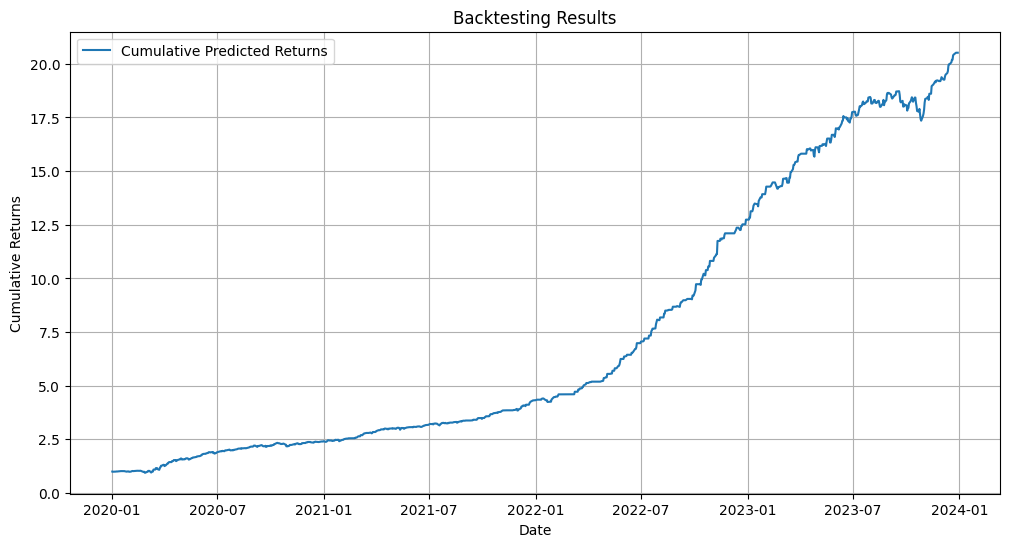

Total Return: 19.513552023492473


<ipython-input-13-645941767b84>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = cumulative_returns[-1] - 1


In [ ]:
# prompt: backtest the model

# ... (Your existing code) ...

# Backtesting
# Assuming 'sp500_1990', 'features', 'best_model' are defined from previous code

# Define the backtesting period
start_date = '2020-01-01'  # Replace with desired start date
end_date = '2023-12-31'    # Replace with desired end date
backtest_data = sp500_1990[(sp500_1990.index >= start_date) & (sp500_1990.index <= end_date)]

# Features for backtesting
X_backtest = backtest_data[features]

# Predictions for the backtesting period
backtest_predictions = best_model.predict(X_backtest)

# Add predictions to backtest data
backtest_data['Predictions'] = backtest_predictions

# Calculate daily returns based on predictions
backtest_data['Predicted_Returns'] = 0.0  # Initialize a column for predicted returns
for i in range(1, len(backtest_data)):
  if backtest_data['Predictions'].iloc[i-1] == 1:
    backtest_data['Predicted_Returns'].iloc[i] = backtest_data['Daily_Return'].iloc[i]
  else:
    backtest_data['Predicted_Returns'].iloc[i] = 0.0  # Or use a different strategy for short positions

# Calculate cumulative returns
cumulative_returns = (1 + backtest_data['Predicted_Returns']).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label='Cumulative Predicted Returns')
plt.title('Backtesting Results')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


# Evaluate Backtesting Performance
# Calculate metrics like total return, Sharpe ratio, maximum drawdown, etc.
total_return = cumulative_returns[-1] - 1
print(f"Total Return: {total_return}")

# ... (add more metrics as needed) ...

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  backtest_data['Predicted_Returns'].iloc[i] = backtest_data['Daily_Return'].iloc[i]
<ipython-input-14-a6fda3fdc246>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_data['Predicted_Returns'].iloc[i] = backtest_data['Daily_Return'].iloc[i]
<ipython-input-14-a6fda3fdc246>:26: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermed

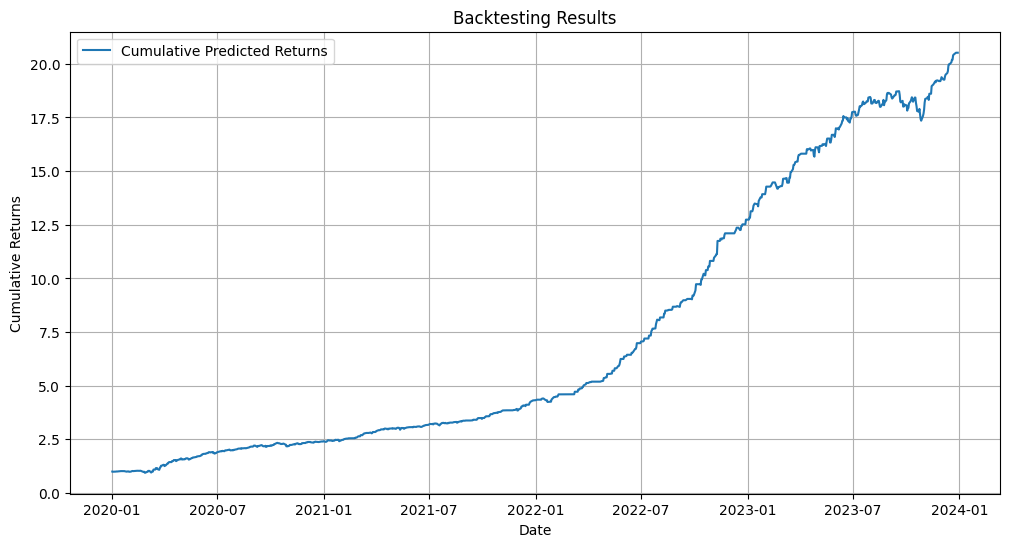

Total Return: 19.513552023492473


<ipython-input-14-a6fda3fdc246>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = cumulative_returns[-1] - 1


In [ ]:
# prompt: predict the accuracy

# ... (Your existing code) ...

# Backtesting
# Assuming 'sp500_1990', 'features', 'best_model' are defined from previous code

# Define the backtesting period
start_date = '2020-01-01'  # Replace with desired start date
end_date = '2023-12-31'    # Replace with desired end date
backtest_data = sp500_1990[(sp500_1990.index >= start_date) & (sp500_1990.index <= end_date)]

# Features for backtesting
X_backtest = backtest_data[features]

# Predictions for the backtesting period
backtest_predictions = best_model.predict(X_backtest)

# Add predictions to backtest data
backtest_data['Predictions'] = backtest_predictions

# Calculate daily returns based on predictions
backtest_data['Predicted_Returns'] = 0.0  # Initialize a column for predicted returns
for i in range(1, len(backtest_data)):
  if backtest_data['Predictions'].iloc[i-1] == 1:
    backtest_data['Predicted_Returns'].iloc[i] = backtest_data['Daily_Return'].iloc[i]
  else:
    backtest_data['Predicted_Returns'].iloc[i] = 0.0  # Or use a different strategy for short positions

# Calculate cumulative returns
cumulative_returns = (1 + backtest_data['Predicted_Returns']).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label='Cumulative Predicted Returns')
plt.title('Backtesting Results')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


# Evaluate Backtesting Performance
# Calculate metrics like total return, Sharpe ratio, maximum drawdown, etc.
total_return = cumulative_returns[-1] - 1
print(f"Total Return: {total_return}")

# ... (add more metrics as needed) ...

In [ ]:
# prompt: probability of how much it is matching with the original data

from sklearn.metrics import accuracy_score

# Assuming 'y_test' and 'predictions' are defined from your model evaluation

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the model: {accuracy}")

# The accuracy represents the proportion of correctly classified instances in the test set.
# It indicates how well the model's predictions match the actual values in the original data.

Accuracy of the model: 0.5194654270772806
